# Задача №12. Анализ ошибок.

Сделать анализ ошибки и нарисовать график зависимости значения ошибки и его стандартного отклонения от объема выборки на обучении и контроле.

In [2]:
%matplotlib inline

import requests
import io
import scipy
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Загружаем данные

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
data = requests.get(url)
assert data.status_code == 200

### Конвертируем датасет в обучучающую и тестирующую выборки

In [7]:
dataset = scipy.genfromtxt(
    io.StringIO(data.text),
    delimiter=',',
    dtype=[('class', scipy.int8), ('features', scipy.float64, (13,))]
)

x = [item[1] for item in dataset]
y = [item[0] for item in dataset]


### Учитывая данные д/з №2, выберем число ближайших соседей равным 10. В качестве метрики будем использовать сумму модулей(manhattan)

In [49]:
k = 10
test_size = range(5, 95, 5)

means = {}
for size in test_size:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=size/100, random_state=42)
    classifier = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    
    error = 1 - scipy.mean(prediction == y_test)
    std = scipy.std(prediction == y_test)
    means[size/100] = [error, std]

### Построение графика

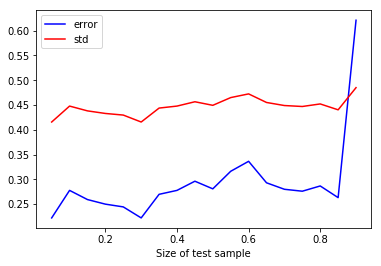

In [50]:
sizes = list(means.keys())
errors = []
stds = []
for item in means.values():
    errors.append(item[0])
    stds.append(item[1])
    
fig, ax = plt.subplots()
ax.plot(sizes, errors, color="blue", label="error")
ax.plot(sizes, stds, color="red", label="std")
ax.set_xlabel("Size of test sample")
ax.legend()

plt.show()
fig.savefig('Error_Analysis.png')